In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from collections import Counter
import re
from wordcloud import WordCloud

In [1]:
import pandas as pd
df = pd.read_csv('/kaggle/input/netflix-data-analysis/netflix_movies (1).csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
print("Type:", df['type'].unique())
print("Rating:", df['rating'].unique())
print("Country:", df['country'].unique())

Type: ['Movie' 'TV Show']
Rating: ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']
Country: ['United States' 'South Africa' nan 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Vene

In [6]:
df_cleaned = df.dropna()

In [7]:
df_cleaned

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


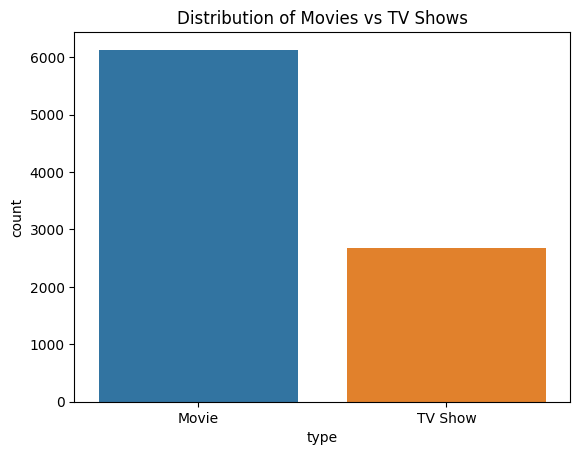

In [9]:
sns.countplot(data=df, x='type')
plt.title('Distribution of Movies vs TV Shows')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


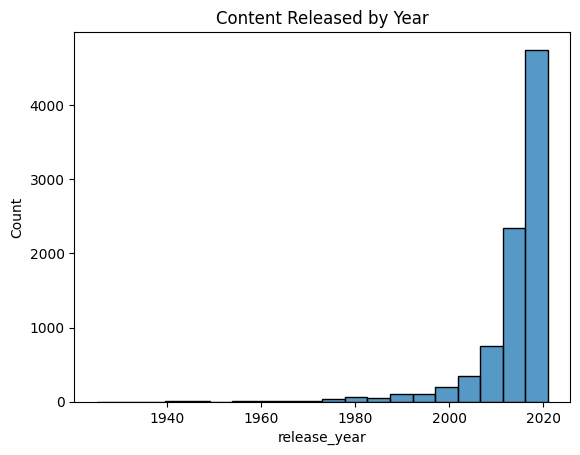

In [10]:
sns.histplot(df['release_year'], kde=False, bins=20)
plt.title('Content Released by Year')
plt.show()

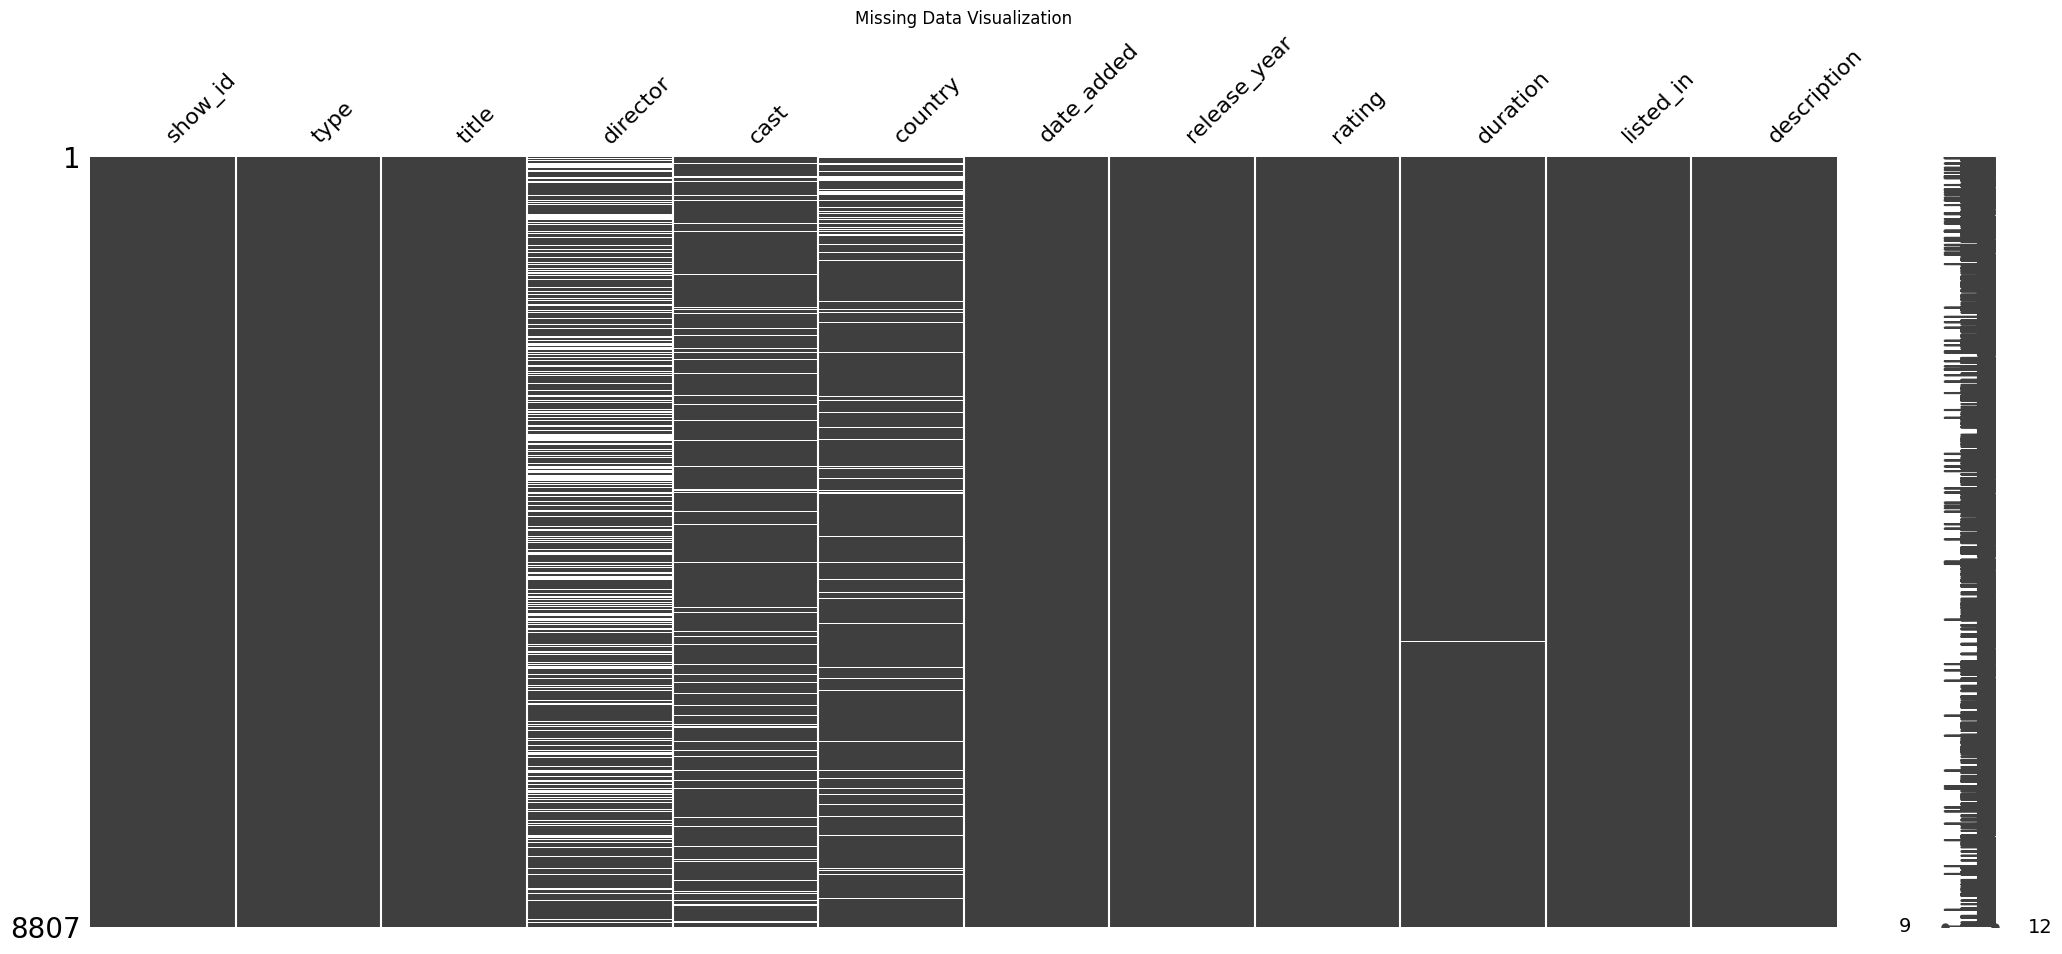

In [12]:
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()

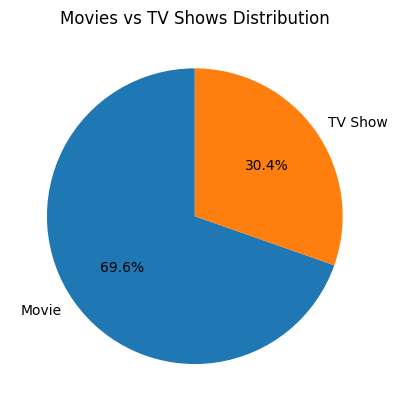

In [13]:
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Movies vs TV Shows Distribution')
plt.show()

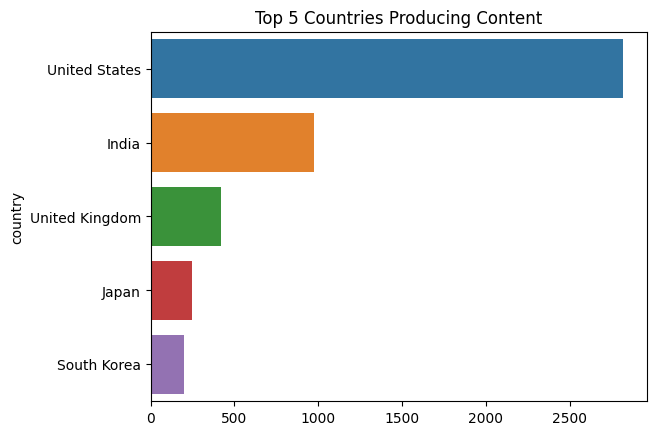

In [14]:
top_countries = df['country'].value_counts().head(5)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 5 Countries Producing Content')
plt.show()

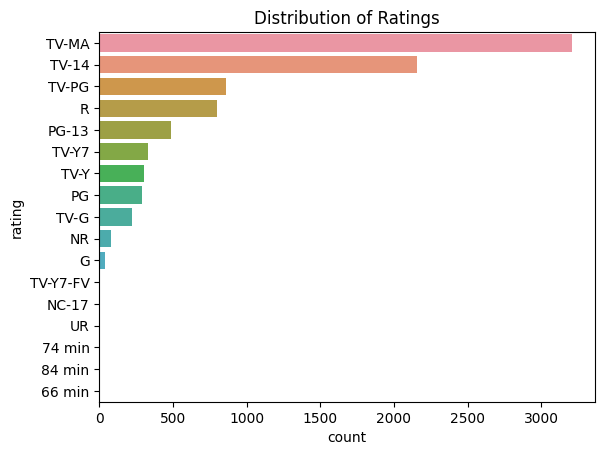

In [15]:
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


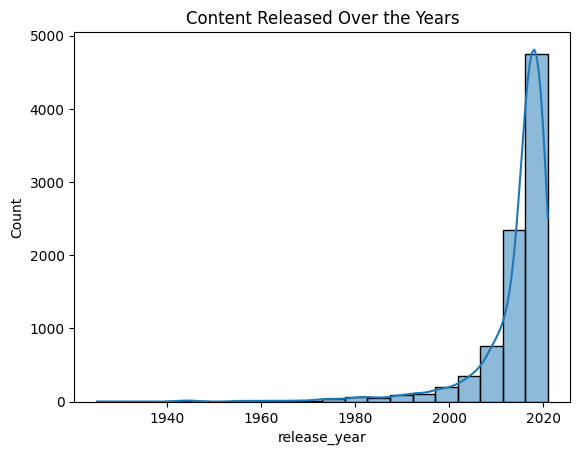

In [16]:
sns.histplot(df['release_year'], bins=20, kde=True)
plt.title('Content Released Over the Years')
plt.show()

In [18]:
df_movies = df_cleaned[df_cleaned['type'] == 'Movie'].copy()
df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(int)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


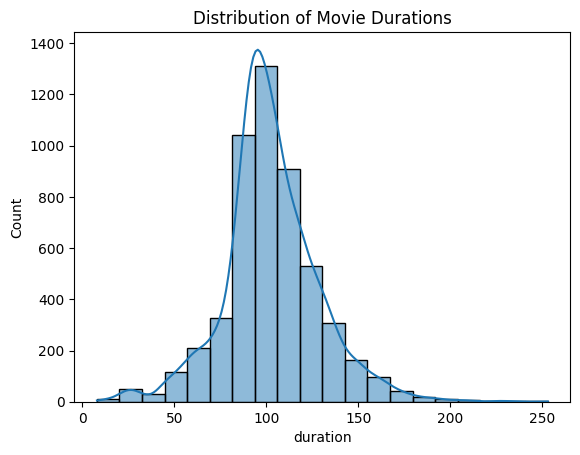

In [19]:
sns.histplot(df_movies['duration'], kde=True, bins=20)
plt.title('Distribution of Movie Durations')
plt.show()

In [20]:
df_shows = df_cleaned[df_cleaned['type'] == 'TV Show'].copy()
df_shows['duration'] = df_shows['duration'].str.extract('(\d+)').astype(int)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


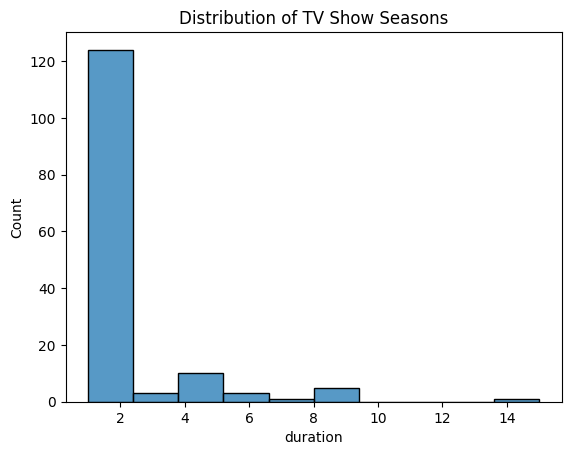

In [21]:
sns.histplot(df_shows['duration'], kde=False, bins=10)
plt.title('Distribution of TV Show Seasons')
plt.show()

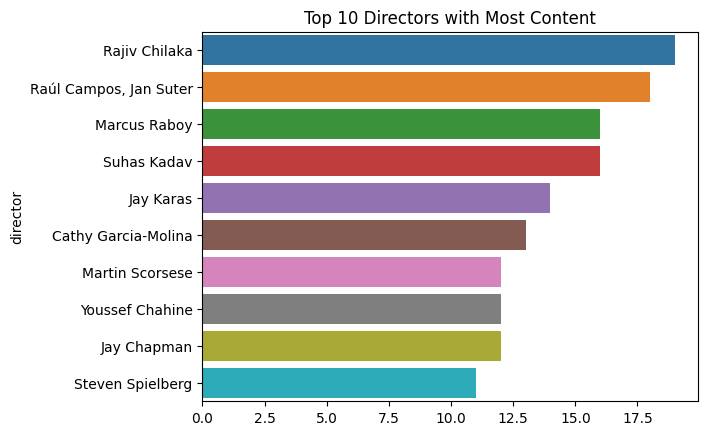

In [23]:
top_directors = df['director'].value_counts().head(10)

sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors with Most Content')
plt.show()

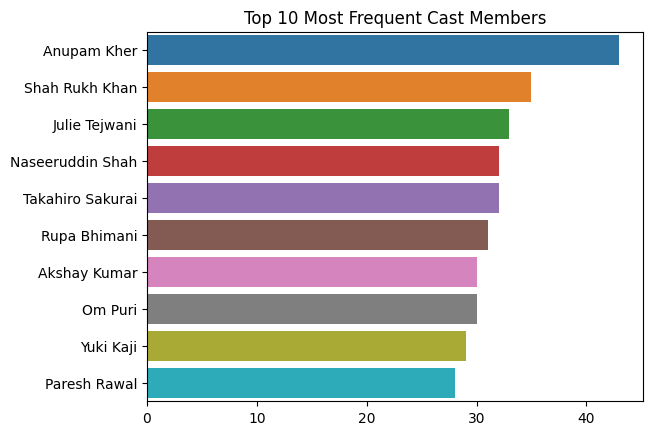

In [24]:
all_cast = ', '.join(df['cast'].dropna())

cast_list = all_cast.split(', ')

cast_series = pd.Series(cast_list)

top_cast = cast_series.value_counts().head(10)

sns.barplot(x=top_cast.values, y=top_cast.index)
plt.title('Top 10 Most Frequent Cast Members')
plt.show()

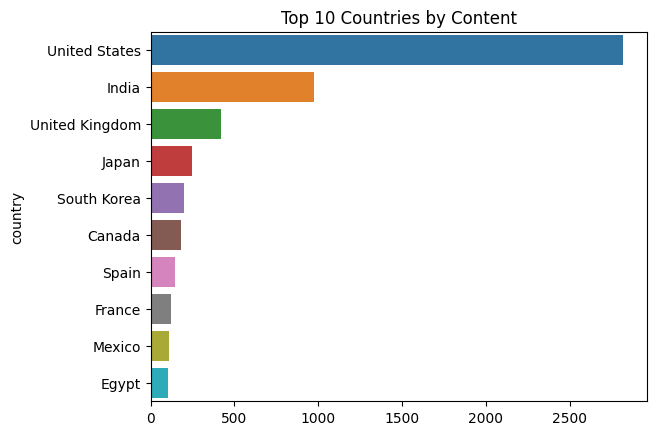

In [25]:
top_countries = df['country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Content')
plt.show()

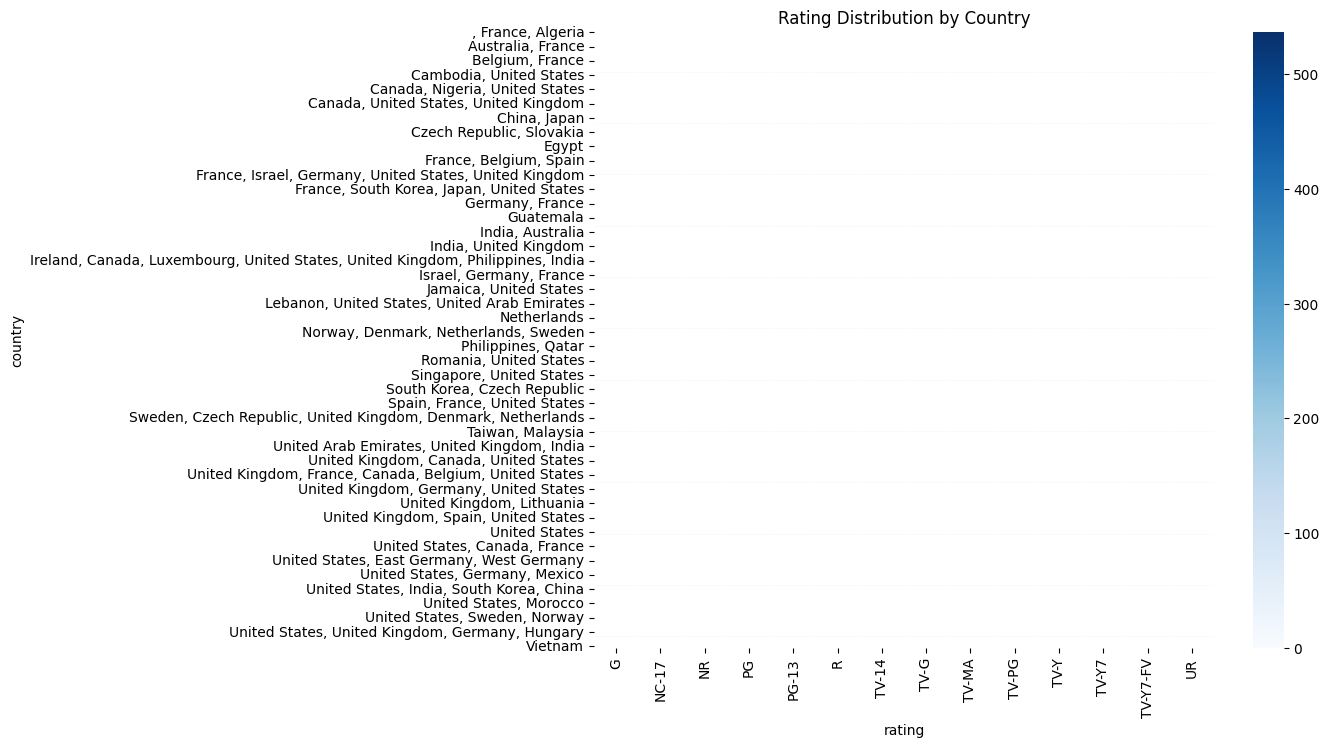

In [27]:
country_rating = df_cleaned.groupby(['country', 'rating']).size().unstack().fillna(0)
plt.figure(figsize=(10, 8))
sns.heatmap(country_rating, cmap='Blues', linewidths=0.5)
plt.title('Rating Distribution by Country')
plt.show()

In [29]:
all_titles = ' '.join(df['title'].dropna())

all_titles_cleaned = re.sub(r'[^\w\s]', '', all_titles.lower())
stop_words = ['the', 'of', 'and', 'in', 'to', 'a', 'for']  # You can expand this list

words = all_titles_cleaned.split()

filtered_words = [word for word in words if word not in stop_words]

word_counts = Counter(filtered_words)

In [30]:
top_words = word_counts.most_common(10)
print("Top 10 words in titles:", top_words)

Top 10 words in titles: [('love', 170), ('my', 144), ('2', 129), ('on', 102), ('with', 99), ('i', 98), ('you', 85), ('man', 81), ('christmas', 78), ('life', 76)]


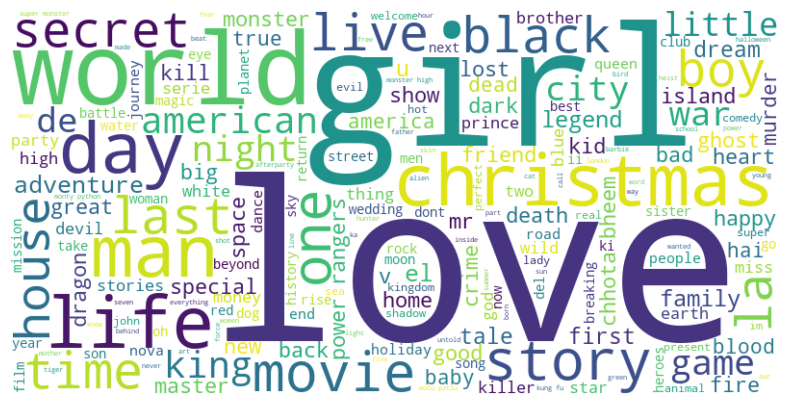

In [32]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

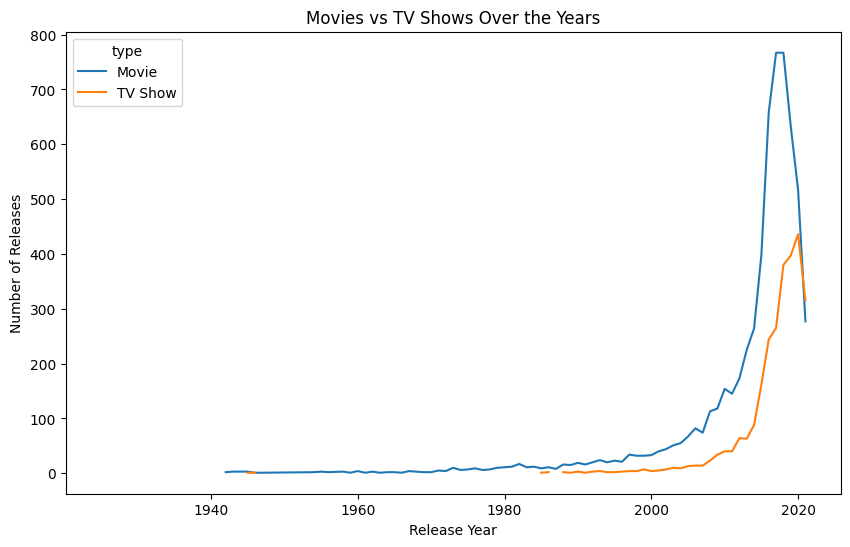

In [33]:
type_year = df.groupby(['release_year', 'type']).size().unstack()

type_year.plot(kind='line', figsize=(10, 6))
plt.title('Movies vs TV Shows Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.show()

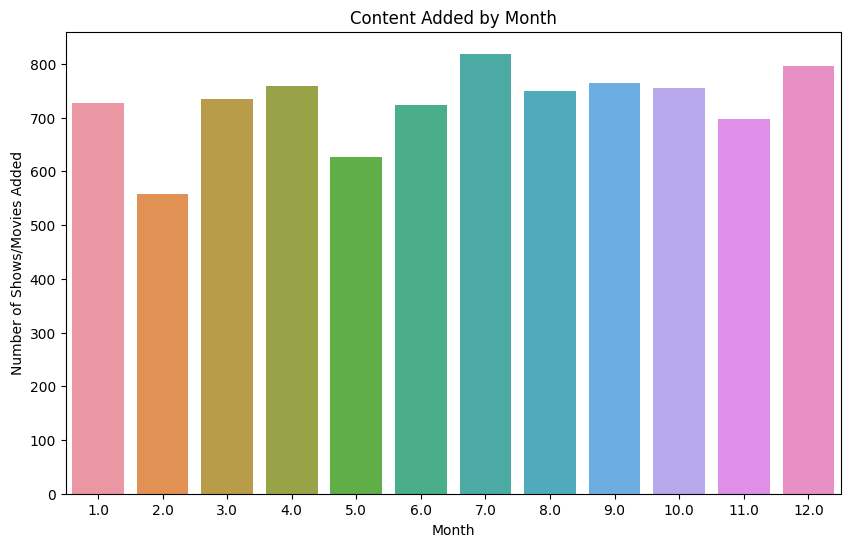

In [34]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

content_by_month = df['month_added'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=content_by_month.index, y=content_by_month.values)
plt.title('Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Shows/Movies Added')
plt.show()